<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 0, FPE -> 3, HQIC ->  0>
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          17.17          15.49
  1   2          3.032          3.841
-------------------------------------
forecast:
[[-0.02236238  0.03961484]
 [-0.00390943  0.04075971]
 [ 0.00331985  0.04018359]
 [ 0.02437677  0.03881549]
 [-0.02489008  0.04001414]]
lower:
[[-0.03177701  0.02961783]
 [-0.01359287  0.02532279]
 [-0.00657373  0.02100911]
 [ 0.01428314  0.01575236]
 [-0.03587008  0.01341332]]
upper:
[[-0.01294775  0.04961184]
 [ 0.005774    0.05619664]
 [ 0.01321343  0.05935806]
 [ 0.03447039  0.06187863]
 [-0.01391009  0.06661495]]
[[0.03433973 0.22617928]
 [0.19486172 1.17273842]]
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: R does not Granger-cause Dp: reject 

(33.51814228583888, 48.602367367294164, 0.49108854964095117)

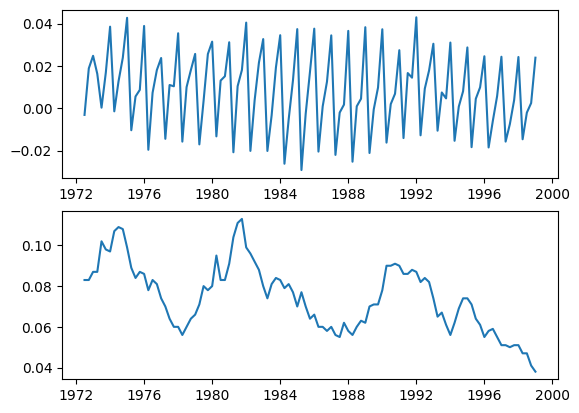

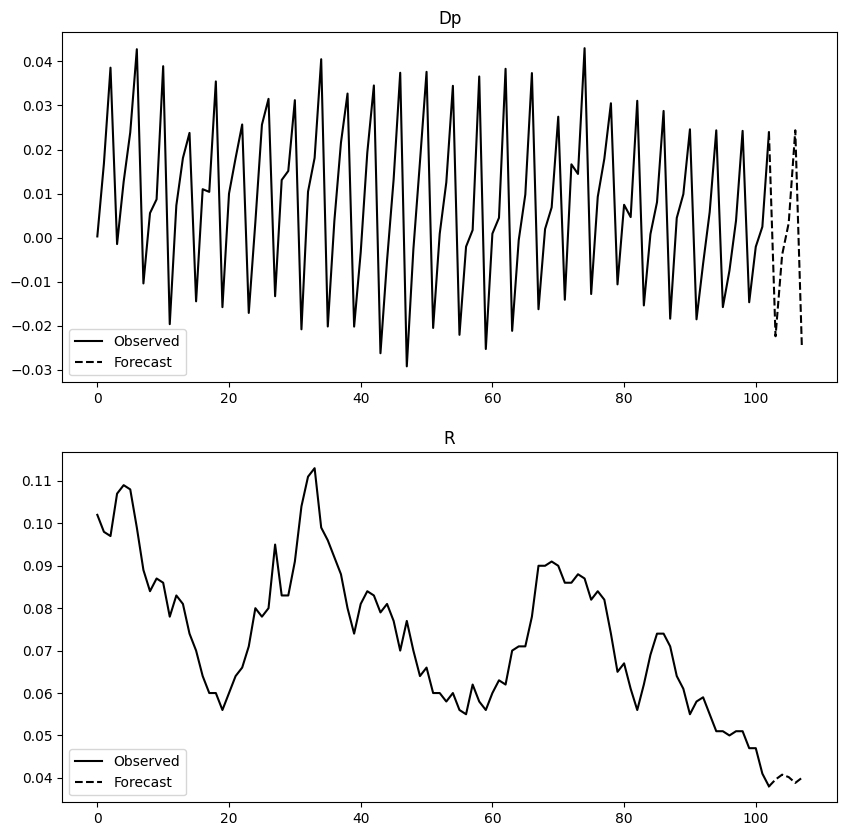

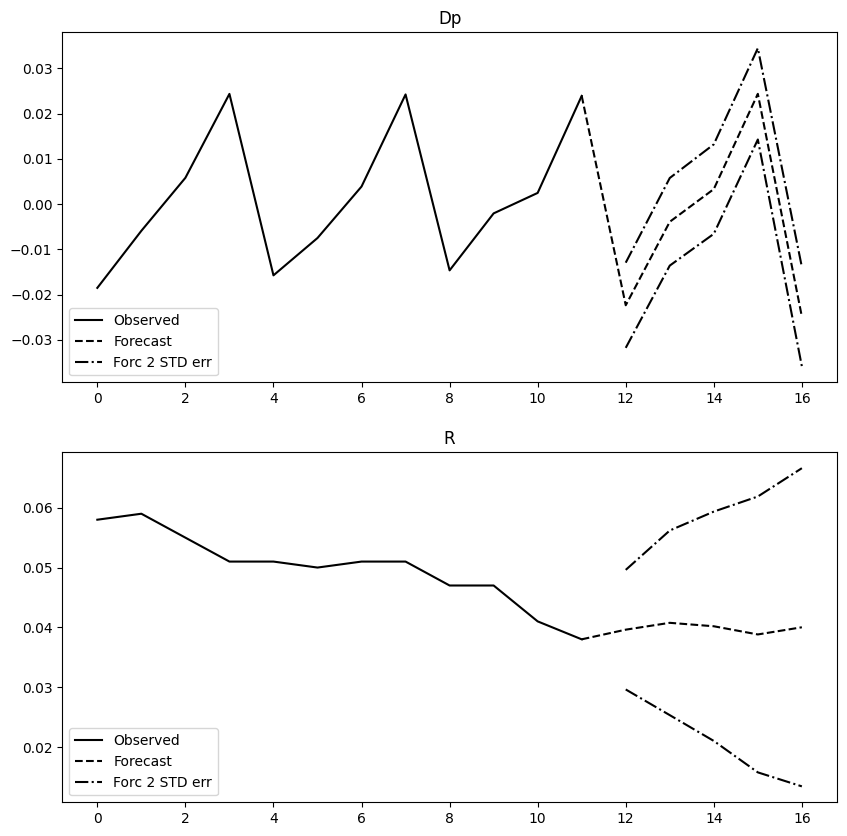

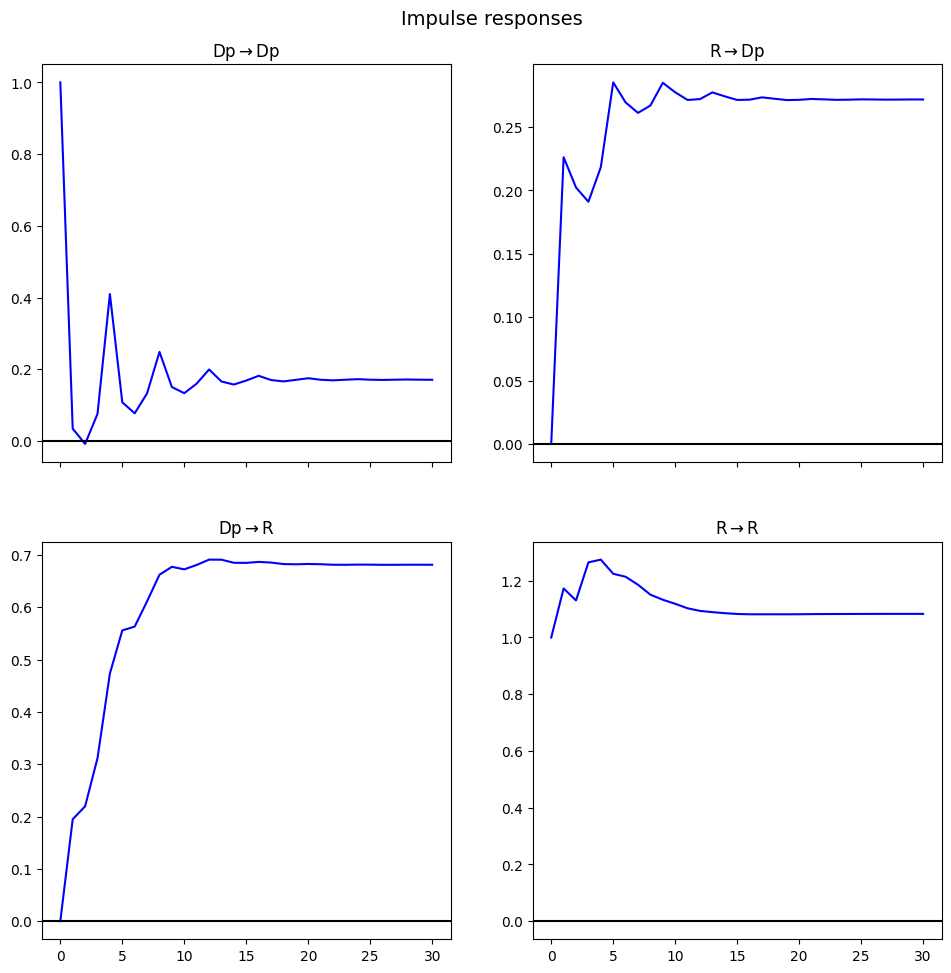

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.vector_ar.vecm import *
import pandas
import statsmodels.datasets.interest_inflation.data as d
df = d.load_pandas().data
dates = df[["year", "quarter"]].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
data = df[["Dp", "R"]]
data.index = pandas.DatetimeIndex(quarterly)
data = data.asfreq('QE-DEC')
data
plt.figure()
ax = plt.subplot(211)
ax.plot(data.index, data["Dp"])
ax = plt.subplot(212)
ax.plot(data.index, data["R"])
lag_order = select_order(data=data, maxlags=10, deterministic="ci", seasons=4)
lag_order.summary()
print(lag_order)
lag_order.aic, lag_order.bic, lag_order.fpe, lag_order.hqic
rank_test = select_coint_rank(data, 0, 3, method="trace", signif=0.05)

rank_test.rank
rank_test.summary()
print(rank_test)
model = VECM(data, deterministic="ci", seasons=4,
             k_ar_diff=lag_order.aic,
             coint_rank=rank_test.rank)
vecm_res = model.fit()
vecm_res.summary()
vecm_res.alpha
vecm_res.stderr_alpha
vecm_res.predict(steps=5)
vecm_res.predict(steps=5, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")
vecm_res.plot_forecast(steps=5, plot_conf_int=False)
vecm_res.plot_forecast(steps=5, n_last_obs=12)
print(vecm_res.var_rep[0])
vecm_res.var_rep
vecm_res.ma_rep(maxn=2)
granger_results = vecm_res.test_granger_causality(caused="Dp", signif=0.05)
granger_results.summary()
print(granger_results)
granger_results.signif, granger_results.pvalue
inst_caus_dp_r = vecm_res.test_inst_causality(causing="Dp")
inst_caus_r_dp = vecm_res.test_inst_causality(causing="R")
inst_caus_r_dp.summary()
inst_caus_dp_r == inst_caus_r_dp
granger_results == vecm_res.test_granger_causality(caused="R", signif=0.05)
num_periods = 30
ir = vecm_res.irf(periods=num_periods)
ir.plot(plot_stderr=False)
norm_test = vecm_res.test_normality()
norm_test.summary()
print(norm_test)
norm_test.test_statistic, norm_test.crit_value, norm_test.pvalue
white_test = vecm_res.test_whiteness(nlags=12, adjusted=True)
white_test.summary()
print(white_test)
white_test.test_statistic, white_test.crit_value, white_test.pvalue